<a href="https://colab.research.google.com/github/BerilCa/Exploration_Data_Analyst/blob/main/adidas_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sales Report Adidas 2020-2021 US

## Todo list

1. Descriptive statistics
2. Retailer and Territory Analysis
3. Product Analysis
4. Time Pattern
5. Profitability Analysis
6. Analysis Sales Method

## Data Preprosesing

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df =pd.read_excel("adidas_sales.xlsx")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


In [ ]:
df.columns = df.iloc[3]
df.drop(range(0, 4), inplace=True)
df.dropna(axis=1, inplace=True)
df.head()

3,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
5,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
6,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
7,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
8,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [ ]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object', name=3)

In [ ]:
df[['Price per Unit','Units Sold','Total Sales','Operating Margin']]=df[['Price per Unit','Units Sold','Total Sales','Operating Margin']].astype(float)
df['year']=pd.to_datetime(df['Invoice Date']).dt.year
df['month']=pd.to_datetime(df['Invoice Date']).dt.strftime('%B')
df['Invoice Date']=pd.to_datetime(df['Invoice Date']).dt.strftime('%Y-%m-')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 4 to 9651
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Retailer          9648 non-null   object 
 1   Retailer ID       9648 non-null   object 
 2   Invoice Date      9648 non-null   object 
 3   Region            9648 non-null   object 
 4   State             9648 non-null   object 
 5   City              9648 non-null   object 
 6   Product           9648 non-null   object 
 7   Price per Unit    9648 non-null   float64
 8   Units Sold        9648 non-null   float64
 9   Total Sales       9648 non-null   float64
 10  Operating Profit  9648 non-null   object 
 11  Operating Margin  9648 non-null   float64
 12  Sales Method      9648 non-null   object 
 13  year              9648 non-null   int64  
 14  month             9648 non-null   object 
dtypes: float64(4), int64(1), object(10)
memory usage: 1.1+ MB


## 1. Descriptive statistics

In [ ]:
df[['Price per Unit','Units Sold','Total Sales','Operating Margin']].describe()

3,Price per Unit,Units Sold,Total Sales,Operating Margin
count,9648.000000,9648.000000,9648.000000,9648.000000
mean,45.216625,256.930037,93273.437500,0.422991
std,14.705397,214.252030,141916.016727,0.097197
min,7.000000,0.000000,0.000000,0.100000
25%,35.000000,106.000000,4254.500000,0.350000
50%,45.000000,176.000000,9576.000000,0.410000
75%,55.000000,350.000000,150000.000000,0.490000
max,110.000000,1275.000000,825000.000000,0.800000


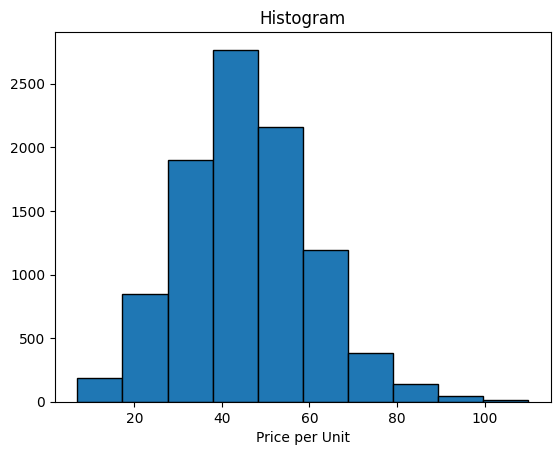

In [ ]:
plt.hist(df['Price per Unit'], bins=10, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Price per Unit')
plt.show()

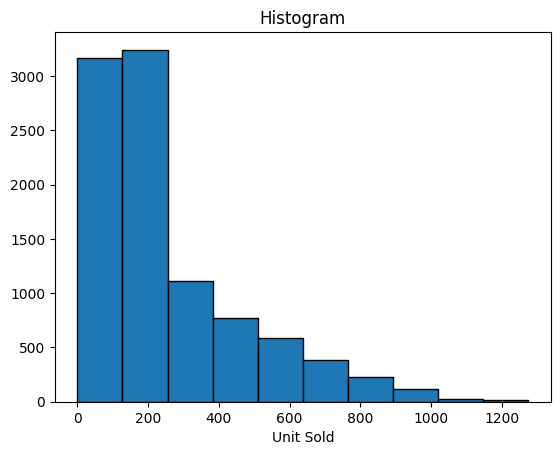

In [ ]:
plt.hist(df['Units Sold'], bins=10, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Unit Sold')
plt.show()

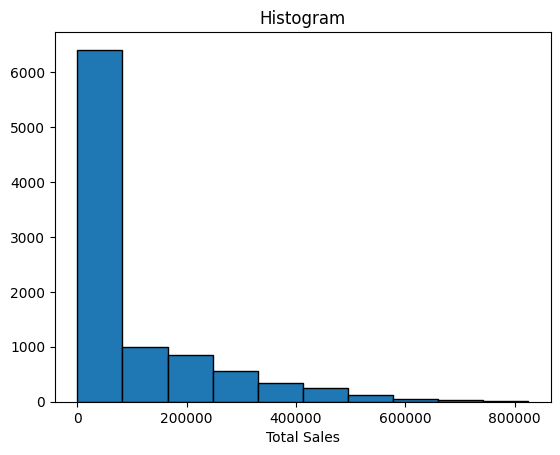

In [ ]:
plt.hist(df['Total Sales'], bins=10, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Total Sales')
plt.show()

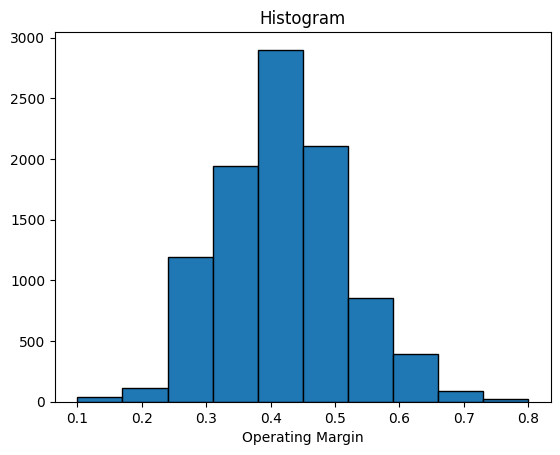

In [ ]:
plt.hist(df['Operating Margin'], bins=10, edgecolor='black')
plt.title('Histogram')
plt.xlabel('Operating Margin')
plt.show()

## 2. Retailer and Territory Analysis

In [ ]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'year',
       'month'],
      dtype='object', name=3)

In [ ]:
df['Retailer'].unique()

array(['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', "Kohl's",
       'Amazon'], dtype=object)

Retailer
Walmart           74558410.0
Amazon            77698912.0
Kohl's           102114753.0
Sports Direct    182470997.0
Foot Locker      220094720.0
West Gear        242964333.0
Name: Total Sales, dtype: float64


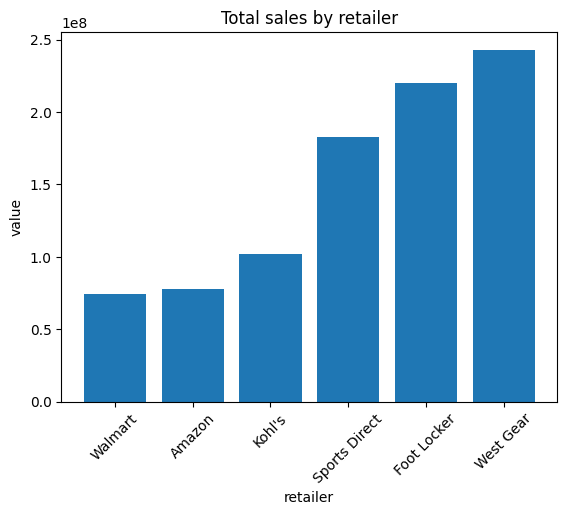

In [ ]:
retailer = df.groupby('Retailer')['Total Sales'].sum().sort_values()
print(retailer)
plt.bar(retailer.index, retailer.values)
plt.title('Total sales by retailer')
plt.xlabel('retailer')
plt.ylabel('value')
plt.xticks(rotation=45)
plt.show()

Retailer       Region   
Amazon         South           409091.0
Kohl's         South          3552055.0
Walmart        West           6791008.0
Foot Locker    South          9307025.0
Amazon         Southeast     10826333.0
Sports Direct  West          12129045.0
Amazon         West          13365025.0
Walmart        Northeast     13712005.0
Kohl's         Northeast     14031168.0
Amazon         Midwest       16835873.0
West Gear      Southeast     17491703.0
Walmart        Southeast     21005539.0
Kohl's         Midwest       22229415.0
West Gear      Midwest       22540586.0
Sports Direct  Northeast     24698097.0
               Midwest       26207191.0
West Gear      Northeast     32293733.0
Walmart        South         33049858.0
West Gear      South         33087031.0
Amazon         Northeast     36262590.0
Foot Locker    West          37804709.0
               Midwest       47987394.0
Sports Direct  Southeast     54178543.0
Foot Locker    Southeast     59669118.0
Kohl's         

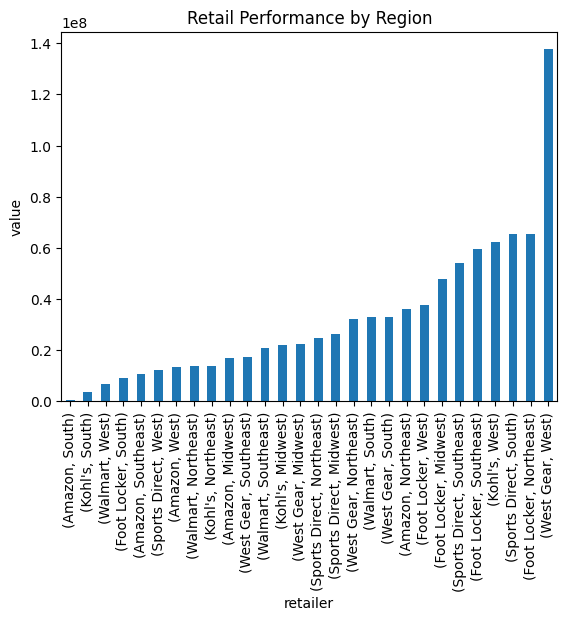

In [ ]:
region_retail=df.groupby(['Retailer', 'Region'])['Total Sales'].sum().sort_values()
print(region_retail)
region_retail.plot(kind='bar')
plt.title('Retail Performance by Region')
plt.xlabel('retailer')
plt.ylabel('value')
plt.xticks(rotation=90)
plt.show()

Retailer
Amazon           30367.232150
Foot Locker      30611.348051
Kohl's           35739.080175
West Gear        36085.877498
Sports Direct    36581.178622
Walmart          41185.387556
Name: Operating Profit, dtype: float64


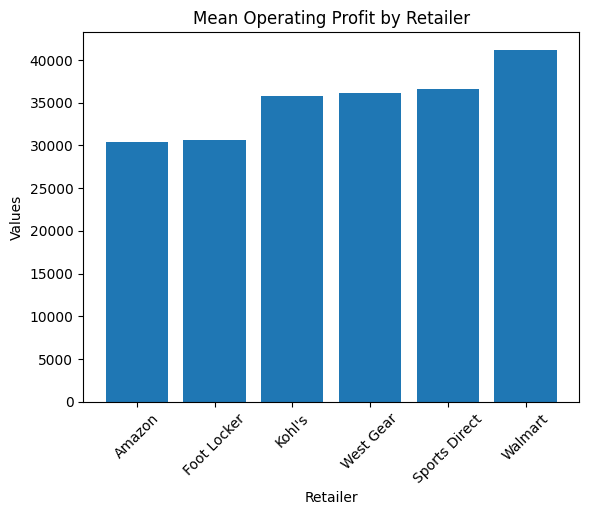

In [ ]:
op_profit = df.groupby('Retailer')['Operating Profit'].mean().sort_values()
print(op_profit)
plt.bar(op_profit.index, op_profit.values)
plt.title('Mean Operating Profit by Retailer')
plt.xlabel('Retailer')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

Retailer
Walmart           254.49
Amazon            396.56
Kohl's            431.87
Sports Direct     904.02
West Gear         991.99
Foot Locker      1102.09
Name: Operating Margin, dtype: float64


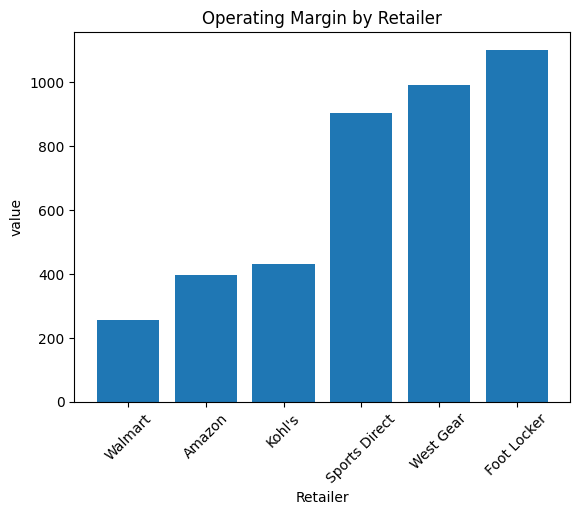

In [ ]:
op_margin = df.groupby('Retailer')['Operating Margin'].sum().sort_values()
print(op_margin)
plt.bar(op_margin.index, op_margin.values)
plt.title('Operating Margin by Retailer')
plt.xlabel('Retailer')
plt.ylabel('value')
plt.xticks(rotation=45)
plt.show()

Region
Southeast    133309.833333
West         110270.907680
South         83717.118634
Northeast     78419.220118
Midwest       72542.980235
Name: Total Sales, dtype: float64


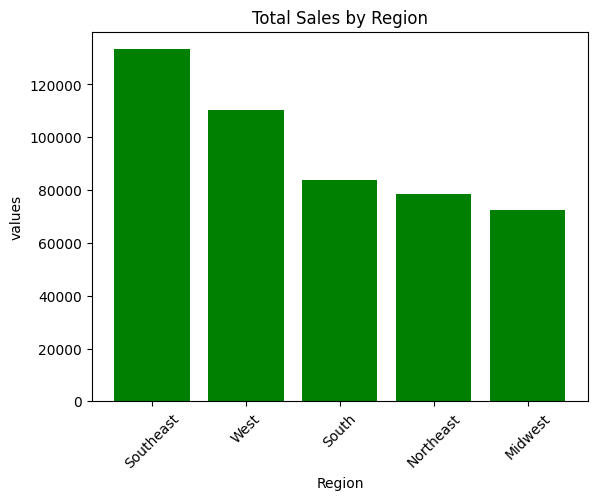

In [ ]:
region = df.groupby('Region')['Total Sales'].mean().sort_values(ascending=False)
print(region)
plt.bar(region.index, region.values, color="green")
plt.title('Total Sales by Region')
plt.xlabel('Region')
plt.ylabel('values')
plt.xticks(rotation=45)
plt.show()

City
Miami            219450.437500
New York         184264.976852
Seattle          182852.208333
Albany           169637.527778
Charlotte        166364.798611
San Francisco    159903.796296
Honolulu         154739.284722
Denver           145809.277778
Charleston       138801.378472
Detroit          129343.284722
Name: Total Sales, dtype: float64


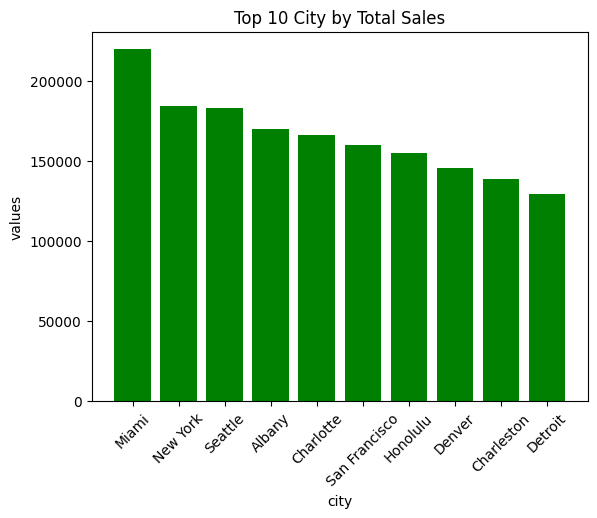

In [ ]:
city = df.groupby('City')['Total Sales'].mean().sort_values(ascending=False)
city=city.head(10)
print(city)

plt.bar(city.index, city.values, color='green')
plt.title('Top 10 City by Total Sales')
plt.xlabel('city')
plt.ylabel('values')
plt.xticks(rotation=45)
plt.show()

## 3. Product Analysis

In [ ]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'year',
       'month'],
      dtype='object', name=3)

In [ ]:
df['Product'].unique()

array(["Men's Street Footwear", "Men's Athletic Footwear",
       "Women's Street Footwear", "Women's Athletic Footwear",
       "Men's Apparel", "Women's Apparel"], dtype=object)

In [ ]:
product=df.groupby('Product')['Units Sold'].mean().sort_values(ascending=False)
product

Product
Men's Street Footwear        368.521739
Men's Athletic Footwear      270.513043
Women's Apparel              269.792910
Women's Street Footwear      243.948383
Women's Athletic Footwear    197.531756
Men's Apparel                190.960772
Name: Units Sold, dtype: float64

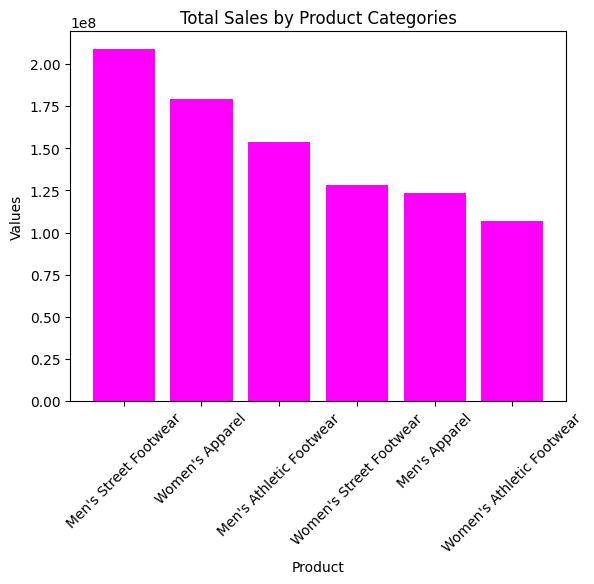

In [ ]:
sales_product = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False)

plt.bar(sales_product.index, sales_product.values, color='magenta')
plt.title('Total Sales by Product Categories')
plt.xlabel('Product')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.show()

In [ ]:
mean = df.groupby('Product')['Price per Unit'].mean().sort_values(ascending=False)
mean

Product
Women's Apparel              51.600746
Men's Apparel                50.321918
Men's Street Footwear        44.236646
Men's Athletic Footwear      43.779503
Women's Athletic Footwear    41.112702
Women's Street Footwear      40.252488
Name: Price per Unit, dtype: float64

## 4. Time Pattern

In [ ]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'year',
       'month'],
      dtype='object', name=3)

year
2020    182080675.0
2021    717821450.0
Name: Total Sales, dtype: float64


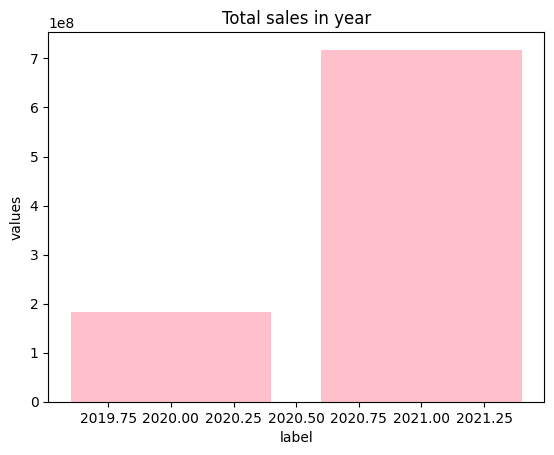

In [ ]:
year=df.groupby('year')['Total Sales'].sum()
print(year)
plt.bar(year.index, year.values, color='pink')
plt.title('Total sales in year')
plt.xlabel('label')
plt.ylabel('values')
plt.show()

In [ ]:
year20 =df[df['year'] == 2020]['Total Sales'].sum()
year21 =df[df['year'] == 2021]['Total Sales'].sum()
total =df['Total Sales'].sum()

avg = year21 - year20
percent = (avg / total)*100
print(percent)

59.5332270162158


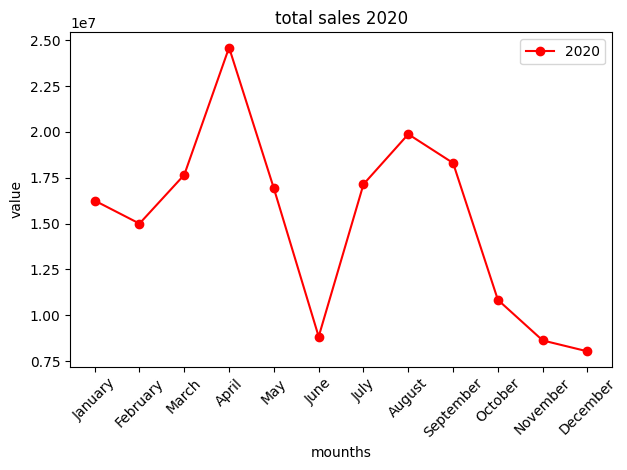

In [ ]:
sale20 = df[df['year']==2020]

sales20 = sale20.groupby('month')['Total Sales'].sum()

all_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November', 'December']

all_sale20 = [sales20.get(month, 0) for month in all_months]

plt.plot(all_months, all_sale20, marker='o', linestyle="-", color='red', label='2020')
plt.title('total sales 2020')
plt.xlabel('mounths')
plt.ylabel('value')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

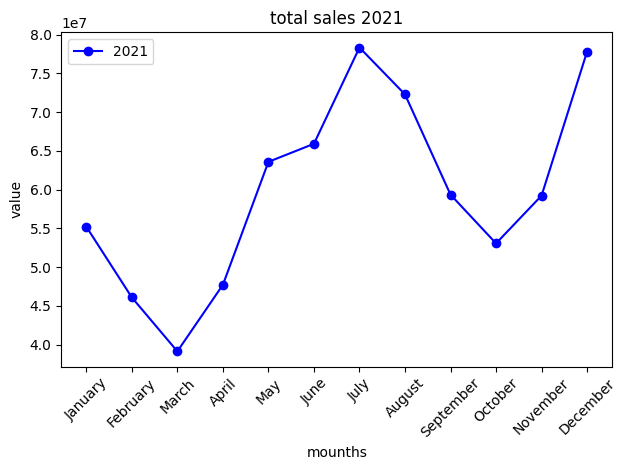

In [ ]:
sale21 = df[df['year']== 2021]

sales21 = sale21.groupby('month')['Total Sales'].sum()

all_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November', 'December']

all_sale21 = [sales21.get(month, 0) for month in all_months]
plt.plot(all_months, all_sale21, marker='o', linestyle="-", color='blue', label='2021')
plt.title('total sales 2021')
plt.xlabel('mounths')
plt.ylabel('value')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

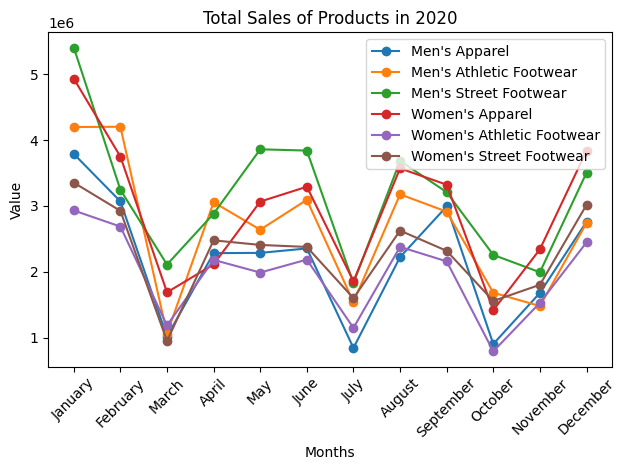

In [ ]:
year20 = df[df['year'] == 2020]

product_sales = year20.groupby(['month', 'Product'])['Total Sales'].sum().unstack()

all_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November', 'December']

for product in product_sales.columns:
    plt.plot(all_months, product_sales[product], marker='o', linestyle='-', label=product)

plt.title('Total Sales of Products in 2020')
plt.xlabel('Months')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

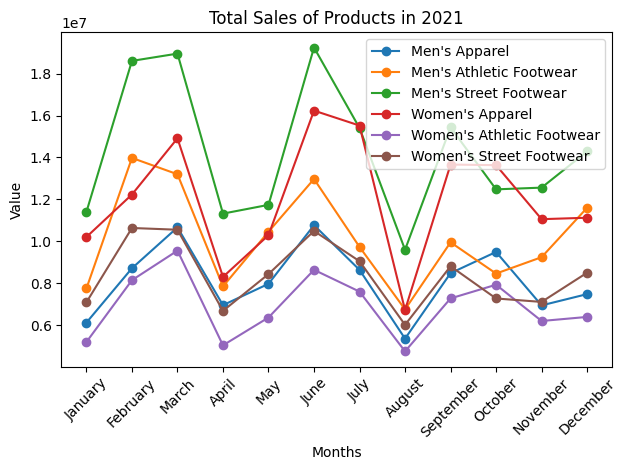

In [ ]:
year21 = df[df['year'] == 2021]

product_sales = year21.groupby(['month', 'Product'])['Total Sales'].sum().unstack()

all_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August','September', 'October', 'November', 'December']

for product in product_sales.columns:
    plt.plot(all_months, product_sales[product], marker='o', linestyle='-', label=product)

plt.title('Total Sales of Products in 2021')
plt.xlabel('Months')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

## 5. Profitability Analysis

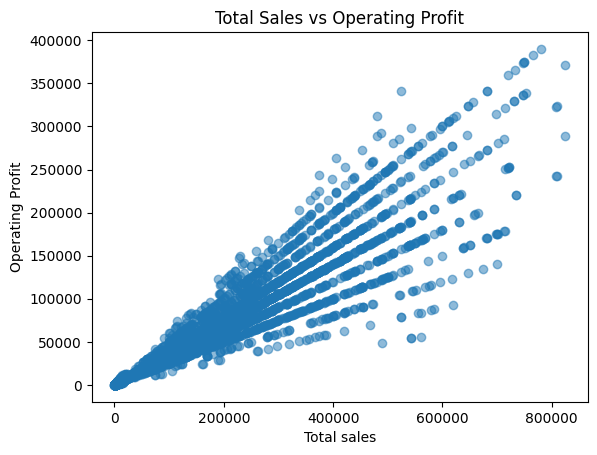

In [ ]:
plt.scatter(df['Total Sales'], df['Operating Profit'], alpha=0.5)
plt.title('Total Sales vs Operating Profit')
plt.xlabel('Total sales')
plt.ylabel('Operating Profit')
plt.show()

## 6. Analysis Sales Method

In [ ]:
df.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Product', 'Price per Unit', 'Units Sold', 'Total Sales',
       'Operating Profit', 'Operating Margin', 'Sales Method', 'year',
       'month'],
      dtype='object', name=3)

Sales Method
In-store    356643750.0
Outlet      295585493.0
Online      247672882.0
Name: Total Sales, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

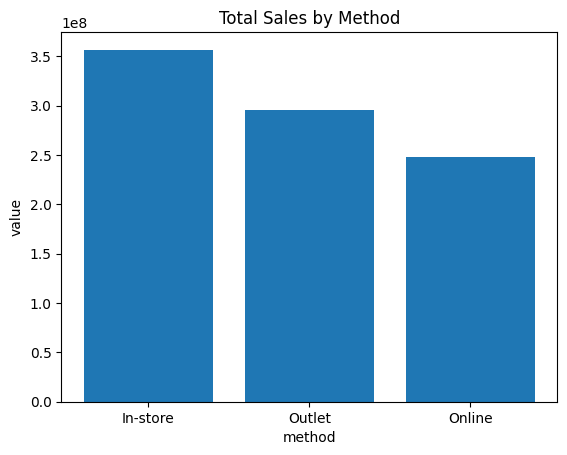

In [ ]:
sales = df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False)
print(sales)

plt.bar(sales.index, sales.values)
plt.title('Total Sales by Method')
plt.xlabel('method')
plt.ylabel('value')
plt.show

Sales Method
In-store     127591287.5
Outlet      107988297.48
Online       96555176.47
Name: Operating Profit, dtype: object


<function matplotlib.pyplot.show(close=None, block=None)>

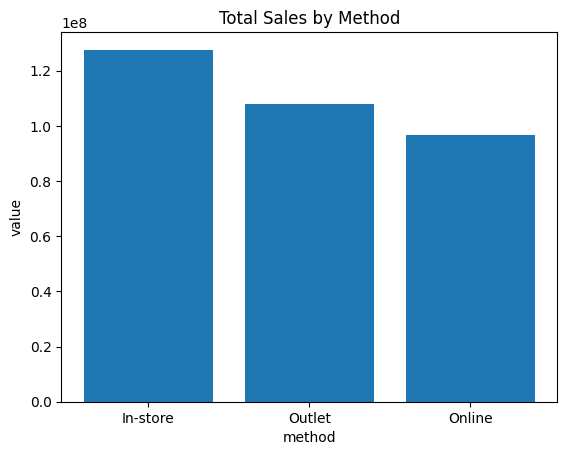

In [ ]:
profit = df.groupby('Sales Method')['Operating Profit'].sum().sort_values(ascending=False)
print(profit)
plt.bar(profit.index, profit.values)
plt.title('Total Sales by Method')
plt.xlabel('method')
plt.ylabel('value')
plt.show